In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from tqdm import tqdm

from math import ceil,floor

In [ ]:
DATA_PATH = "Data/train/"

In [ ]:
def make_log_hist(img):
    hist, bins = np.histogram(img.flatten(),bins = list(range(0,256)))
    log_hist = []
    for h in hist:
        if h == 0:
            log_hist.append(0)
        else:
            log_hist.append(np.log10(h))
    return np.array(log_hist)

# Quick Look at Images

In [ ]:
ids = next(os.walk(f"{DATA_PATH}img"))[2]
print("No. of images = ", len(ids))

No. of images =  1102


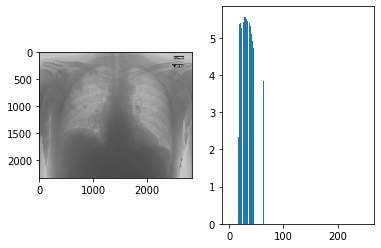

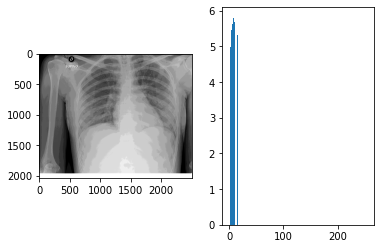

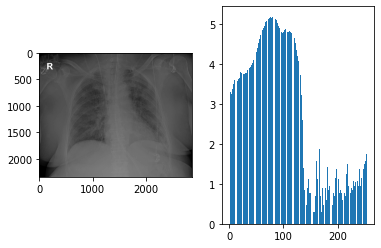

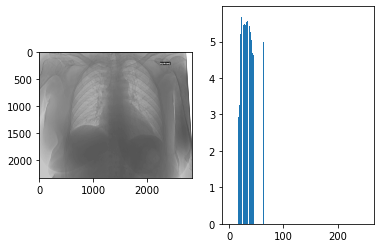

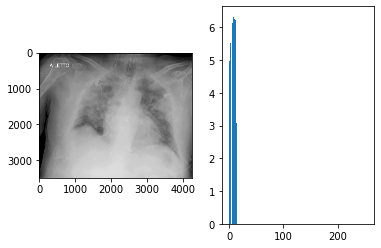

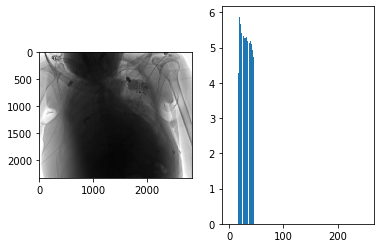

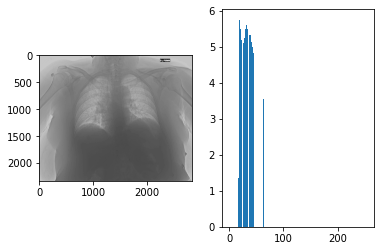

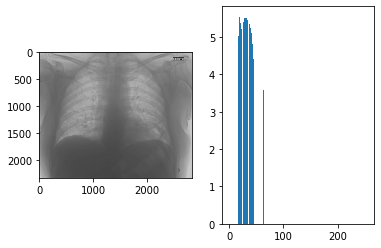

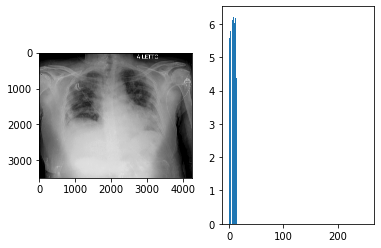

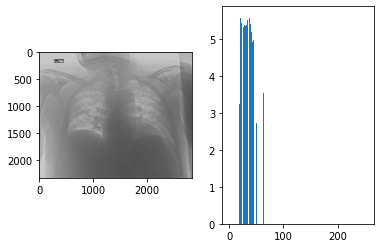

In [ ]:
np.random.seed(420)
ids_random = [ids[i] for i in np.random.randint(0,len(ids),10)]
for iid in ids_random:
    img = cv2.imread(f"{DATA_PATH}img/{iid}",0)
    log_hist = make_log_hist(img)
    fig, ax = plt.subplots(1,2)
    ax[0].imshow(img,"gray")
    ax[1].bar(list(range(0,255)),log_hist)
    plt.show()

The width of histograms are kinda fucked...

# Dataframe

In [ ]:
df_original = pd.read_excel(f"{DATA_PATH}trainClinData.xls")
df_original = df_original.drop(250) # Has no image included

df = df_original.drop(["Hospital","Row_number"], axis = 1)

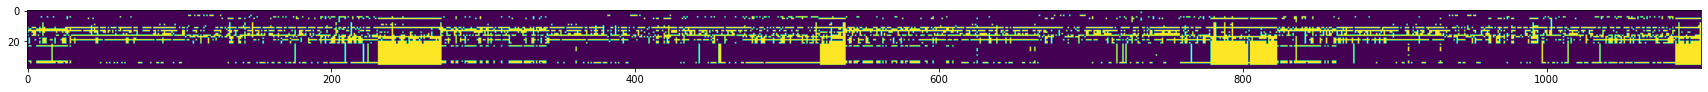

In [ ]:
plt.figure(figsize=(30,10))
plt.imshow(df.isna().T)

Many missing

In [ ]:
# Separate continuous and discrete
continuous_features = ["Age","Temp_C","DaysFever","WBC","RBC","CRP","Fibrinogen","Glucose","PCT","LDH","INR","D_dimer","Ox_percentage","PaO2","SaO2","PaCO2","pH"]
discrete_features = ["Sex","PositivityAtAdmission","Cough","DifficultyInBreathing","CardiovascularDisease","IschemicHeartDisease","AtrialFibrillation","HeartFailure","Ictus","HighBloodPressure","Diabetes","Dementia","BPCO","Cancer","ChronicKidneyDisease","RespiratoryFailure","Obesity","Position"]
target_feature = ["Death"]

In [ ]:
# encode Prognosis labels
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df.Prognosis = le.fit_transform(df.Prognosis)

In [ ]:
#Fill continuous features with mean and discrete features with median
for col in list(df.columns):
    if col in continuous_features:
        df[col].fillna(value=np.mean(df[col].dropna()),inplace=True)
    elif col in discrete_features:
        df[col].fillna(value=np.median(df[col].dropna()),inplace=True)

In [ ]:
df.head()

,ImageFile,Age,Sex,PositivityAtAdmission,Temp_C,DaysFever,Cough,DifficultyInBreathing,WBC,RBC,...,Diabetes,Dementia,BPCO,Cancer,ChronicKidneyDisease,RespiratoryFailure,Obesity,Position,Prognosis,Death
0,P_102.png,72.000000,1,1.0,37.3,3.0,1.0,0.0,5.37,4.58,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1,0
1,P_131.png,35.913889,0,1.0,39.3,3.0,1.0,0.0,5.76,5.24,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0
2,P_132.png,57.266667,0,1.0,37.0,3.0,0.0,0.0,11.48,5.71,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
3,P_117.png,39.000000,1,1.0,37.2,2.0,1.0,0.0,10.17,3.45,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0
4,P_16.png,44.000000,0,1.0,38.0,3.0,1.0,0.0,6.64,5.55,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0


In [ ]:
# Scale continuous features tpo have 0 mean and 1 variance
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[continuous_features] = scaler.fit_transform(df[continuous_features])

In [ ]:
df.head()

,ImageFile,Age,Sex,PositivityAtAdmission,Temp_C,DaysFever,Cough,DifficultyInBreathing,WBC,RBC,...,Diabetes,Dementia,BPCO,Cancer,ChronicKidneyDisease,RespiratoryFailure,Obesity,Position,Prognosis,Death
0,P_102.png,0.491454,1,1.0,-0.277384,0.307604,1.0,0.0,-0.455296,0.010368,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1,0
1,P_131.png,-1.901363,0,1.0,1.924856,0.307604,1.0,0.0,-0.352677,0.961978,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0
2,P_132.png,-0.485492,0,1.0,-0.607720,0.307604,0.0,0.0,1.152398,1.639639,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
3,P_117.png,-1.696727,1,1.0,-0.387496,-0.802613,1.0,0.0,0.807704,-1.618903,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0
4,P_16.png,-1.365185,0,1.0,0.493400,0.307604,1.0,0.0,-0.121127,1.408946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0


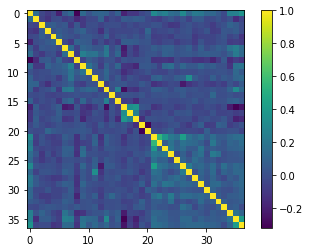

In [ ]:
# Correlation between features
plt.imshow(df.drop("ImageFile", axis = 1).corr().to_numpy())
plt.colorbar()

Age,Prognosis & Death seem to be correlated

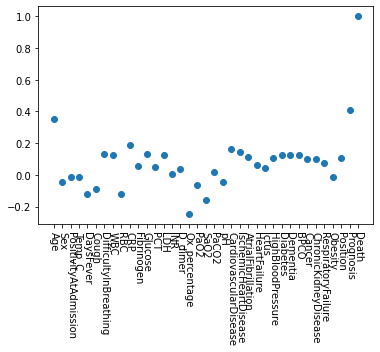

In [ ]:
plt.plot(df.drop("ImageFile", axis = 1).columns,df.drop("ImageFile", axis = 1).corr().Death.to_numpy(),"o")
_ = plt.xticks(rotation=-90)

In [ ]:
img_df = df[["ImageFile","Prognosis"]]
df = df.drop("ImageFile", axis = 1)

In [ ]:
img_df.to_csv(f"{DATA_PATH}img_df.csv",index=False)

# Logistic Baseline

Let's do a Logistic regression to see if the inclusion of prognosis improves the results!

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [ ]:
df_no_prognosis = df.drop("Prognosis", axis = 1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_no_prognosis.drop("Death",axis = 1), 1-df_no_prognosis.Death, test_size=0.33, random_state=42)

model = LogisticRegression()
model.fit(X_train,y_train)

y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,roc_auc_score,f1_score

In [ ]:
acc = accuracy_score(y_test,y_pred)
pr = precision_score(y_test,y_pred)
rc = recall_score(y_test,y_pred)
auroc = roc_auc_score(y_test,model.predict_proba(X_test)[:,1])
f1 =  f1_score(y_test,y_pred)

In [ ]:
from sklearn.metrics import precision_recall_curve,roc_curve

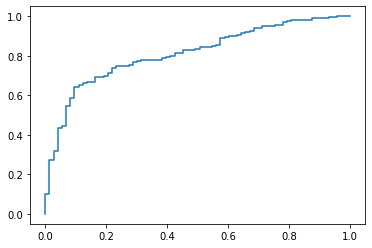

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
plt.plot(fpr,tpr)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df.drop("Death",axis = 1), 1-df.Death, test_size=0.33, random_state=42)

model = LogisticRegression()
model.fit(X_train,y_train)

y_pred = model.predict(X_test)

acc_full = accuracy_score(y_test,y_pred)
pr_full = precision_score(y_test,y_pred)
rc_full = recall_score(y_test,y_pred)
auroc_full = roc_auc_score(y_test,model.predict_proba(X_test)[:,1])
f1_full =  f1_score(y_test,y_pred)

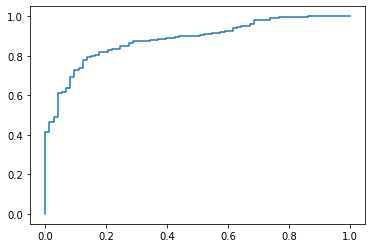

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
plt.plot(fpr,tpr)

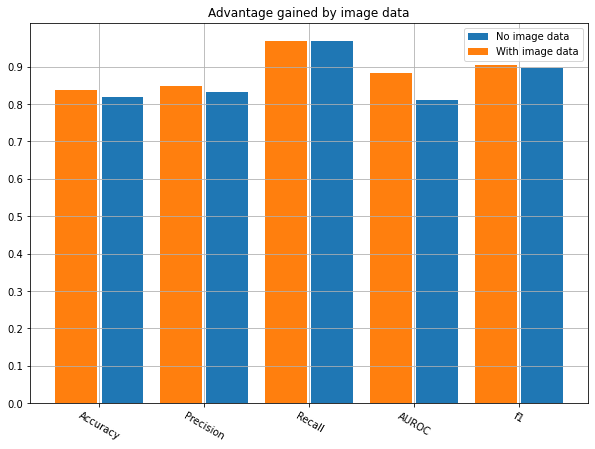

In [ ]:
# Compare
plt.figure(figsize=(10,7))
tags = ["Accuracy","Precision","Recall","AUROC","f1"]
xvals = np.array([0,1,2,3,4])
plt.bar(xvals+0.22,[acc,pr,rc,auroc,f1],0.4,label = "No image data")
plt.bar(xvals-0.22,[acc_full,pr_full,rc_full,auroc_full,f1_full],0.4,label = "With image data")


plt.title("Advantage gained by image data")
plt.xticks(ticks = xvals,rotation=-30,labels=tags)
plt.yticks(ticks=[0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])
plt.legend()
plt.grid()

AUROC improves the most, nothing gets worse.

# Let's Preform PCA on images and see what happens

In [ ]:
imgs = []
for iid in tqdm(df_original.ImageFile):
    img = cv2.imread(f"{DATA_PATH}img/{iid}",0)
    img = cv2.resize(img, (224,224), interpolation = cv2.INTER_AREA) #Resize to fit vgg19-s input
    imgs.append(img.flatten())

100%|███████████████████████████████████████████████████████████████████████████████| 1102/1102 [05:25<00:00,  3.39it/s]


In [ ]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(imgs)

X = pca.transform(imgs)

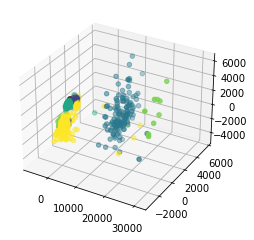

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(X[:,0],X[:,1],X[:,2],c = LabelEncoder().fit_transform(df_original.Hospital))

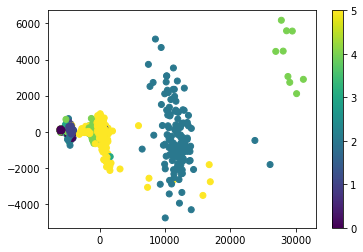

In [ ]:
plt.scatter(X[:,0],X[:,2],c = LabelEncoder().fit_transform(df_original.Hospital))
plt.colorbar()

Looks like the clusters roughly corespond to which hospital took the X-Ray of the patient.

### Does the cluster structure change after Histogram Equalization?

In [ ]:
imgs = []
for iid in tqdm(df_original.ImageFile):
    img = cv2.imread(f"{DATA_PATH}img/{iid}",0)
    img = cv2.resize(img, (224,224), interpolation = cv2.INTER_AREA) #Resize to fit vgg19-s input
    img = cv2.equalizeHist(img)
    imgs.append(img.flatten())
    
pca = PCA()
pca.fit(imgs)

X = pca.transform(imgs)

100%|███████████████████████████████████████████████████████████████████████████████| 1102/1102 [05:10<00:00,  3.55it/s]


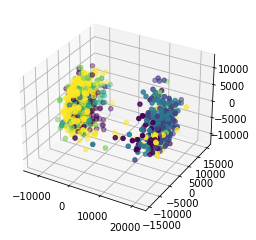

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(X[:,0],X[:,1],X[:,2],c = LabelEncoder().fit_transform(df_original.Hospital))

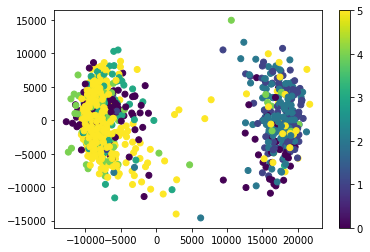

In [ ]:
plt.scatter(X[:,0],X[:,1],c = LabelEncoder().fit_transform(df_original.Hospital))
plt.colorbar()

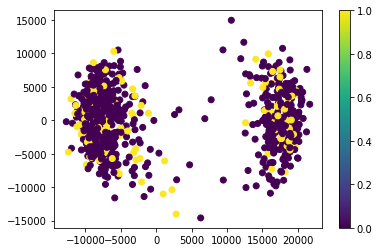

In [ ]:
plt.scatter(X[:,0],X[:,1],c = LabelEncoder().fit_transform(df_original.Death))
plt.colorbar()

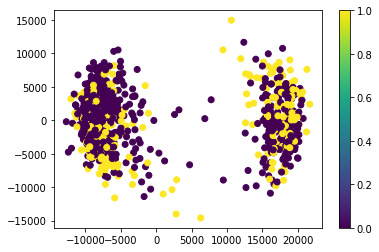

In [ ]:
plt.scatter(X[:,0],X[:,1],c = LabelEncoder().fit_transform(df_original.Sex))
plt.colorbar()

So ... what do the two clusters correspond to?

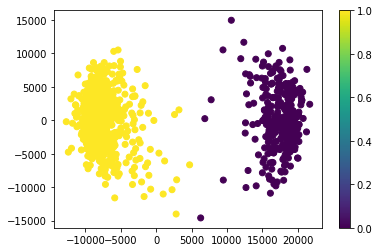

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=0).fit(X)

plt.scatter(X[:,0],X[:,1],c = kmeans.labels_)
plt.colorbar()

In [ ]:
df_modified = df.copy()
df_modified["Clusters"] = kmeans.labels_
df_modified.head()

,Age,Sex,PositivityAtAdmission,Temp_C,DaysFever,Cough,DifficultyInBreathing,WBC,RBC,CRP,...,Dementia,BPCO,Cancer,ChronicKidneyDisease,RespiratoryFailure,Obesity,Position,Prognosis,Death,Clusters
0,0.491454,1,1.0,-0.277384,0.307604,1.0,0.0,-0.455296,0.010368,-0.495362,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1,0,0
1,-1.901363,0,1.0,1.924856,0.307604,1.0,0.0,-0.352677,0.961978,0.165734,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0,1
2,-0.485492,0,1.0,-0.607720,0.307604,0.0,0.0,1.152398,1.639639,0.511032,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1
3,-1.696727,1,1.0,-0.387496,-0.802613,1.0,0.0,0.807704,-1.618903,-0.549168,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0
4,-1.365185,0,1.0,0.493400,0.307604,1.0,0.0,-0.121127,1.408946,-0.474577,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0


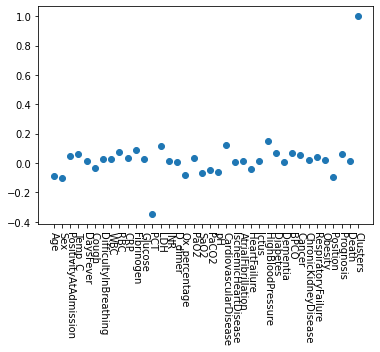

In [ ]:
plt.plot(df_modified.columns,df_modified.corr().Clusters.to_numpy(),"o")
_ = plt.xticks(rotation=-90)

Short answer: No idea...

# Preprocessing Images

In [ ]:
width = 224
height = 224
dim = (width,height)

for iid in tqdm(ids):
    img = cv2.imread(f"{DATA_PATH}img/{iid}",0)
    img = cv2.equalizeHist(img)
    img = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
    cv2.imwrite(f"{DATA_PATH}img_preprocessed/{iid}",img)